# Comparison of Equatorial EUC/TC structure to TAO data

In [4]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import numpy as np
import pandas as pd
import IPython.display
import cmocean as cm

from dask.distributed import Client

import sys, os
#sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
sys.path.append('/home/561/rmh561/ACCESS-OM2-1-025-010deg-report/figures/')  # so we can import ../exptdata
import exptdata

print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [5]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [8]:
cc.start_cluster()
#client = Client('tcp://10.0.64.12:8786', local_dir='/local/g40/amh157')
#client

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 35706:127.0.0.1:35706 vdi-n10.nci.org.au -l rmh561


<Client: scheduler='tcp://127.0.0.1:39050' processes=4 cores=8>

In [68]:
def find_temp(ekey,lon):

    expt = exptdata.exptdict[ekey]['expt']
    n_files = exptdata.exptdict[ekey]['n_files']
    time_units = exptdata.exptdict[ekey]['time_units']
    offset = exptdata.exptdict[ekey]['offset']
    
    temp = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                          chunks={'st_ocean': None}, n=n_files,
                          time_units = time_units, offset=offset, use_cache=True)
    temp_eq = temp.sel(st_ocean=slice(0,400)).sel(yt_ocean=0., method='nearest')\
                        .sel(xt_ocean=lon, method='nearest').sel(time=slice(pd.datetime(1998,1,1),None))\
                        .mean('time').load() - 273.15

    return temp_eq

def find_u(ekey,lon):

    expt = exptdata.exptdict[ekey]['expt']
    n_files = exptdata.exptdict[ekey]['n_files']
    time_units = exptdata.exptdict[ekey]['time_units']
    offset = exptdata.exptdict[ekey]['offset']
    
    u = cc.get_nc_variable(expt, 'ocean.nc', 'u',
                          chunks={'st_ocean': None}, n=n_files,
                          time_units = time_units, offset=offset, use_cache=True)
    u_eq = u.sel(st_ocean=slice(0,400)).sel(yu_ocean=0., method='nearest')\
                        .sel(xu_ocean=lon, method='nearest').sel(time=slice(pd.datetime(1998,1,1),None))\
                        .mean('time').load()*100
    return u_eq

In [98]:
obs_th = 2500
# Get TAO data 140W:
tao140_file_temp = xr.open_dataset('/g/data/e14/rmh561/TAO/t0n140w_dy.cdf')
tao140_temp = tao140_file_temp['T_20'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))
tao140_temp = tao140_temp.where(tao140_temp!=1.e35)
count = np.count_nonzero(~np.isnan(tao140_temp), axis=0)
tao140_temp = tao140_temp.isel(depth=count>=obs_th) # Only average if more than x observations at given depth
tao140_file_u = xr.open_dataset('/g/data/e14/rmh561/TAO/adcp0n140w_dy.cdf')
tao140_u = tao140_file_u['u_1205'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))/100.
tao140_u = tao140_u.where(abs(tao140_u)<=100.)
count = np.count_nonzero(~np.isnan(tao140_u), axis=0)
tao140_u = tao140_u.isel(depth=count>=obs_th)  # Only average if more than x observations at given depth

tao140_file_uc = xr.open_dataset('/g/data/e14/rmh561/TAO/cur0n140w_dy.cdf')
tao140_uc = tao140_file_uc['U_320'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))/100.
tao140_uc = tao140_uc.where(abs(tao140_uc)<=100.)
count = np.count_nonzero(~np.isnan(tao140_uc), axis=0)
tao140_uc = tao140_uc.isel(depth=count>=obs_th)  # Only average if more than x observations at given depth

# Get TAO data 165E:
tao165_file_temp = xr.open_dataset('/g/data/e14/rmh561/TAO/t0n165e_dy.cdf')
tao165_temp = tao165_file_temp['T_20'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))
tao165_temp = tao165_temp.where(tao165_temp!=1.e35)
count = np.count_nonzero(~np.isnan(tao165_temp), axis=0)
tao165_temp = tao165_temp.isel(depth=count>=obs_th) # Only average if more than x observations at given depth
tao165_file_u = xr.open_dataset('/g/data/e14/rmh561/TAO/adcp0n165e_dy.cdf')
tao165_u = tao165_file_u['u_1205'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))/100.
tao165_u = tao165_u.where(abs(tao165_u)<=100.)
count = np.count_nonzero(~np.isnan(tao165_u), axis=0)
tao165_u = tao165_u.isel(depth=count>=obs_th)  # Only average if more than x observations at given depth

tao165_file_uc = xr.open_dataset('/g/data/e14/rmh561/TAO/cur0n165e_dy.cdf')
tao165_uc = tao165_file_uc['U_320'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))/100.
tao165_uc = tao165_uc.where(abs(tao165_uc)<=100.)
count = np.count_nonzero(~np.isnan(tao165_uc), axis=0)
tao165_uc = tao165_uc.isel(depth=count>=obs_th)  # Only average if more than x observations at given depth


In [77]:
# Get Johnson et al data:
joh_file = xr.open_dataset('/g/data1/v45/fw4078/obs-data/meanfit_m.cdf')
joh_temp = joh_file['POTEMPM']
joh_u = joh_file['UM']

joh140_temp_eq = joh_temp.sel(ZDEP1_50=slice(0,400)).sel(YLAT11_101=0., method='nearest').sel(XLON=220.,method='nearest')
joh140_u_eq = joh_u.sel(ZDEP1_50=slice(0,400)).sel(YLAT11_101=0., method='nearest').sel(XLON=220.,method='nearest')
joh165_temp_eq = joh_temp.sel(ZDEP1_50=slice(0,400)).sel(YLAT11_101=0., method='nearest').sel(XLON=165.,method='nearest')
joh165_u_eq = joh_u.sel(ZDEP1_50=slice(0,400)).sel(YLAT11_101=0., method='nearest').sel(XLON=165.,method='nearest')

dep_joh = joh140_temp_eq.ZDEP1_50

In [79]:
# Get WOA data:
temp_WOA13_10 = cc.get_nc_variable('woa13/10_KDS50', 'woa13_ts_??_mom10.nc', 'temp').mean('time').sel(GRID_Y_T=0.,method='nearest')
woa13140_temp_eq = temp_WOA13_10.sel(GRID_X_T=-140.,method='nearest')
woa13165_temp_eq = temp_WOA13_10.sel(GRID_X_T=-195.,method='nearest')

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean.nc_temp_-12_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean.nc_u_-12_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean.nc_temp_-12_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean.nc_u_-12_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean.nc_temp_-34_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean.nc_u_-34_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean.nc_temp_-34_days-since-1718-01-01_-87658_False.pkl


Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean.nc_u_-34_days-since-1718-01-01_-87658_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_temp_None_days-since-0001-01-01_None_False.pkl


Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_u_None_days-since-0001-01-01_None_False.pkl


Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_temp_None_days-since-0001-01-01_None_False.pkl


Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_u_None_days-since-0001-01-01_None_False.pkl


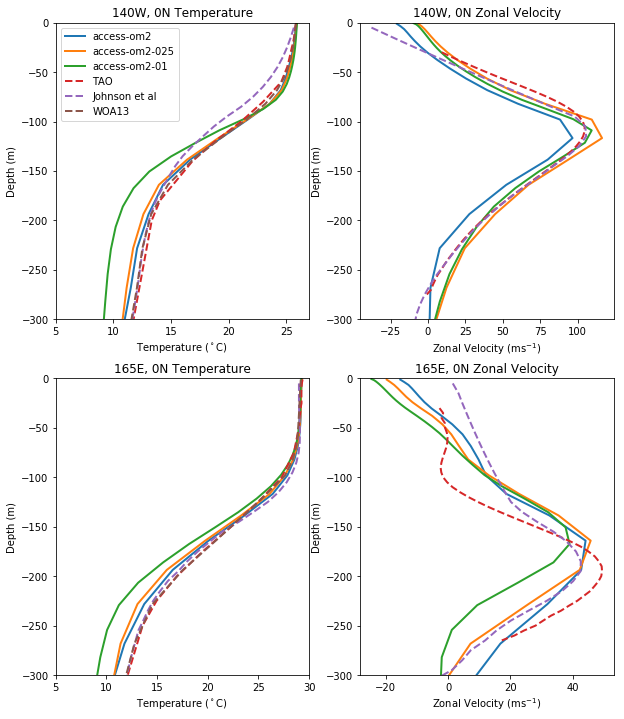

In [103]:
# Plot Annual mean:
f = plt.figure(figsize=(10,12),facecolor='white')
for i, ekey in enumerate(exptdata.exptdict.keys()):
#for ekey in ['1deg']:
    t_eq140 = find_temp(ekey,-140.)
    u_eq140 = find_u(ekey,-140.)
    t_eq165 = find_temp(ekey,-195.)
    u_eq165 = find_u(ekey,-195.)
    
    tax = plt.subplot(2,2,1);
    tax.plot(t_eq140.values,-t_eq140.st_ocean.values,label=exptdata.exptdict[ekey]['model'],linewidth=2)

    uax = plt.subplot(2,2,2)
    uax.plot(u_eq140.values,-u_eq140.st_ocean.values,linewidth=2)

    tax2 = plt.subplot(2,2,3);
    tax2.plot(t_eq165.values,-t_eq165.st_ocean.values,label=exptdata.exptdict[ekey]['model'],linewidth=2)

    uax2 = plt.subplot(2,2,4)
    uax2.plot(u_eq165.values,-u_eq165.st_ocean.values,linewidth=2)


tax.plot(tao140_temp.mean('time'),-tao140_temp.depth,'--',linewidth=2,label='TAO')
tax.plot(joh140_temp_eq,-dep_joh,'--',linewidth=2,label='Johnson et al')
tax.plot(woa13140_temp_eq.values,-woa13140_temp_eq.ZT.values,'--',linewidth=2,label='WOA13')
tax.set_xlabel('Temperature ($^\circ$C)')
tax.set_ylabel('Depth (m)')
tax.legend(loc=2)
tax.set_ylim([-300.,0.])
tax.set_xlim([5.,27.])
tax.set_title('140W, 0N Temperature')

uax.plot(tao140_u.mean('time')*100.,-tao140_u.depth,'--',linewidth=2)
# uax.plot(tao140_uc.mean('time')*100.,-tao140_uc.depth,':',linewidth=2)
uax.plot(joh140_u_eq*100.,-dep_joh,'--',linewidth=2)
uax.set_xlabel('Zonal Velocity (ms$^{-1}$)')
uax.set_ylabel('Depth (m)')
uax.set_ylim([-300.,0.])
uax.set_title('140W, 0N Zonal Velocity')

tax2.plot(tao165_temp.mean('time'),-tao165_temp.depth,'--',linewidth=2,label='TAO')
tax2.plot(joh165_temp_eq,-dep_joh,'--',linewidth=2,label='Johnson et al')
tax2.plot(woa13165_temp_eq.values,-woa13165_temp_eq.ZT.values,'--',linewidth=2,label='WOA13')
tax2.set_xlabel('Temperature ($^\circ$C)')
tax2.set_ylabel('Depth (m)')
# tax2.legend(loc=2)
tax2.set_ylim([-300.,0.])
tax2.set_xlim([5.,30.])
tax2.set_title('165E, 0N Temperature')

uax2.plot(tao165_u.mean('time')*100.,-tao165_u.depth,'--',linewidth=2)
# uax2.plot(tao165_uc.mean('time')*100.,-tao165_uc.depth,':',linewidth=2)
uax2.plot(joh165_u_eq*100.,-dep_joh,'--',linewidth=2,label='TAO')
uax2.set_xlabel('Zonal Velocity (ms$^{-1}$)')
uax2.set_ylabel('Depth (m)')
uax2.set_ylim([-300.,0.])
uax2.set_title('165E, 0N Zonal Velocity')
savefigure('Equatorial_Pacific_profiles_140W_165E')